# Imports

In [1]:
import pandas as pd
import seaborn as sns
pd.set_option('display.max_columns', None)
import os
import matplotlib.pyplot as plt

In [2]:
years = [2019, 2018,2017,2016,2015,2014,2013,2012,2011,2010,2008,2006,2004,2002,2001,2000,1999,1998]

number = [18,15,16,9,15,11,9,8,7,7,5,3,1,2,3,0,1,1]

number_of_studies_per_year=pd.DataFrame(list(zip(years, number)),
               columns =['years', 'number'])

#Referencia: https://www.emilkhatib.com/analyzing-trends-in-data-with-pandas/
import numpy as np
selected=number_of_studies_per_year["number"]
coefficients, residuals, _, _, _ = np.polyfit(range(len(selected.index)),selected,1,full=True)
mse = residuals[0]/(len(selected.index))
nrmse = np.sqrt(mse)/(selected.max() - selected.min())
print('Slope ' + str(coefficients[0]))
print('NRMSE: ' + str(nrmse))
print("----------------------")

Slope -1.0309597523219818
NRMSE: 0.09855498735542062
----------------------


Slope 1.0309597523219816
NRMSE: 0.09855498735542069
coefficients: [ 1.03095975 -1.48538012]
----------------------


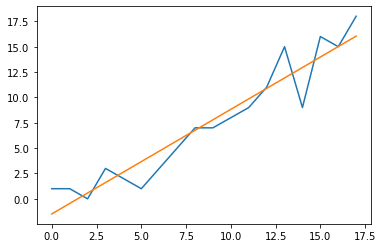

In [3]:
years=list(reversed(years))
number=list(reversed(number))

number_of_studies_per_year=pd.DataFrame(list(zip(years, number)),
               columns =['years', 'number'])

#Referencia: https://www.emilkhatib.com/analyzing-trends-in-data-with-pandas/
import numpy as np
selected=number_of_studies_per_year["number"]
coefficients, residuals, _, _, _ = np.polyfit(range(len(selected.index)),selected,1,full=True)
mse = residuals[0]/(len(selected.index))
nrmse = np.sqrt(mse)/(selected.max() - selected.min())
print('Slope ' + str(coefficients[0]))
print('NRMSE: ' + str(nrmse))
print("coefficients: "+ str(coefficients))
print("----------------------")

plt.plot(selected)
plt.plot([coefficients[0]*x + coefficients[1] for x in range(len(selected))])
plt.show()

### Global variables

In [4]:
question_list = ['Are the impirical research objectives and the research questions defined in advance?',
       '\nIs the research protocol explicit? (data collection, population definition, analysis mechanisms ...)',
       '\nAre threats to validity conducted in a systematic way, and are countermeasures taken to reduce them?',
       '\nIs a pilot study presented in the research?',
       '\nIs the data presented or made available for further analysis?',
       '\nDoes the research make evident the method of analysis applied in your data?',
       'Do the findings of the empirical study answer the research questions and / or hypotheses that have been raised?',
       'Is the case and its analysis units explicitly defined and presented? (size, domain, process and subjects)',
       'Does the researcher avoid any interference in the process, technique and methodology used in the case study?',
       'Is triangulation applied? (multiple methods of collection and analysis, multiple authors and various theories)',
       'Are ethical issues handled appropriately (personal intentions, integrity, confidentiality, consent and approval of the review board)?',
       'Does the study report provide implications for practice?',
       'Are the hypothesis (null hypothesis and alternative hypothesis) presented?',
       'Does any method was used to comprove/reject  the hyphotesis?',
       'Are the independent, dependent variables and their metrics presented?',
       'Were quantitative methods applied to interpret the results?',
       'Are the treatments presented?', 'Is randomized the sample?',
       'Is it possible to identify the population, the intervention and the outcome in main research question?',
       'Are the reviews inclusion and exclusion criteria described?',
       'Is the search strategy defined in the study?',
       'Did the reviewers assess the quality/validity of the included studies',
       'The study specifies and thoroughly describes its sampling method (e.g. nonprobabilistic\nsampling methods, probabilistic sampling methods,etc.).',
       'The study describes how the questionnaire was designed (e.g. the number of questions, type and wording of the questions, question sequence and grouping, translations, etc.).',
       'The questionnaire of the study is available (e.g. attached to the report or included as an appendix, etc.).',
       'The study provides information on its response rate.',
       'The study formally assesses its trustworthiness (e.g. through calculating measurementerror, sample frame error, error of  selection, non-response error, etc.).']

### Import dataset

In [5]:
df = pd.read_csv("sumarization.csv")
df.head()

Papers  Year Author Perspective  \
0  Análise glossemática da estrutura das linguage...  1998       Not Reported   
1  Searching for Preferences of Autistic Children...  2017         Case Study   
2  Sistema de recomendação para apoiar a construç...  2013       Not Reported   
3  Gerando conhecimento sobre os homens, mulheres...  2001       Not Reported   
4  Customizing a communication device for a child...  2012         Case Study   

  Are the impirical research objectives and the research questions defined in advance?  \
0                                          Partially                                     
1                                          Partially                                     
2                                                Yes                                     
3                                          Partially                                     
4                                          Partially                                     

  \nIs the research protocol explicit? (data collection, population definition, analysis mechanisms ...)  \
0                                          Partially                                                       
1                                                Yes                                                       
2                                                Yes                                                       
3                                          Partially                                                       
4                                          Partially                                                       

  \nAre threats to validity conducted in a systematic way, and are countermeasures taken to reduce them?  \
0                                                 No                                                       
1                                          Partially                                                       
2                                                 No                                                       
3                                                 No                                                       
4                                                 No                                                       

  \nIs a pilot study presented in the research?  \
0                                            No   
1                                           Yes   
2                                            No   
3                                            No   
4                                            No   

  \nIs the data presented or made available for further analysis?  \
0                                          Partially                
1                                                Yes                
2                                          Partially                
3                                                 No                
4                                          Partially                

  \nDoes the research make evident the method of analysis applied in your data?  \
0                                                Yes                              
1                                                Yes                              
2                                                Yes                              
3                                                 No                              
4                                                 No                              

  Do the findings of the empirical study answer the research questions and / or hypotheses that have been raised?  \
0                                          Partially                                                                
1                                          Partially                                                                
2                                                Yes                                                                
3                              

### Preprocess dataset

In [6]:
df = df.replace(["Yes",'Partially', "No"],[1,0.5,0])
df.head()

Papers  Year Author Perspective  \
0  Análise glossemática da estrutura das linguage...  1998       Not Reported   
1  Searching for Preferences of Autistic Children...  2017         Case Study   
2  Sistema de recomendação para apoiar a construç...  2013       Not Reported   
3  Gerando conhecimento sobre os homens, mulheres...  2001       Not Reported   
4  Customizing a communication device for a child...  2012         Case Study   

   Are the impirical research objectives and the research questions defined in advance?  \
0                                                0.5                                      
1                                                0.5                                      
2                                                1.0                                      
3                                                0.5                                      
4                                                0.5                                      

   \nIs the research protocol explicit? (data collection, population definition, analysis mechanisms ...)  \
0                                                0.5                                                        
1                                                1.0                                                        
2                                                1.0                                                        
3                                                0.5                                                        
4                                                0.5                                                        

   \nAre threats to validity conducted in a systematic way, and are countermeasures taken to reduce them?  \
0                                                0.0                                                        
1                                                0.5                                                        
2                                                0.0                                                        
3                                                0.0                                                        
4                                                0.0                                                        

   \nIs a pilot study presented in the research?  \
0                                              0   
1                                              1   
2                                              0   
3                                              0   
4                                              0   

   \nIs the data presented or made available for further analysis?  \
0                                                0.5                 
1                                                1.0                 
2                                                0.5                 
3                                                0.0                 
4                                                0.5                 

   \nDoes the research make evident the method of analysis applied in your data?  \
0                                                  1                               
1                                                  1                               
2                                                  1                               
3                                                  0                               
4                                                  0                               

   Do the findings of the empirical study answer the research questions and / or hypotheses that have been raised?  \
0                                                0.5                                                                 
1                                                0.5                                                                 
2                                                1.0                                                         

### Mean per year of each question

In [7]:
result_dt = {}
for question in question_list:
#     print("Question: "+question)
    mean_list = []
    for year in range(1998,2020,1):
        mean=df.loc[df["Year"] == year][question].mean()
#         print("Mean: "+str(mean))
        mean_list.append(mean)
    result_dt.update({question:mean_list})         
# result_dt

index = range(1998,2020,1)
df=pd.DataFrame(data=result_dt, index=index)
df.head()

Are the impirical research objectives and the research questions defined in advance?  \
1998                                           0.187500                                      
1999                                           0.166667                                      
2000                                           0.125000                                      
2001                                           0.318182                                      
2002                                           0.333333                                      

      \nIs the research protocol explicit? (data collection, population definition, analysis mechanisms ...)  \
1998                                           0.125000                                                        
1999                                           0.333333                                                        
2000                                           0.125000                                                        
2001                                           0.409091                                                        
2002                                           0.166667                                                        

      \nAre threats to validity conducted in a systematic way, and are countermeasures taken to reduce them?  \
1998                                           0.000000                                                        
1999                                           0.166667                                                        
2000                                           0.000000                                                        
2001                                           0.045455                                                        
2002                                           0.083333                                                        

      \nIs a pilot study presented in the research?  \
1998                                            0.0   
1999                                            0.0   
2000                                            0.0   
2001                                            0.0   
2002                                            0.0   

      \nIs the data presented or made available for further analysis?  \
1998                                           0.062500                 
1999                                           0.250000                 
2000                                           0.062500                 
2001                                           0.227273                 
2002                                           0.166667                 

      \nDoes the research make evident the method of analysis applied in your data?  \
1998                                           0.125000                               
1999                                           0.500000                               
2000                                           0.000000                               
2001                                           0.272727                               
2002                                           0.333333                               

      Do the findings of the empirical study answer the research questions and / or hypotheses that have been raised?  \
1998                                           0.125000                                                                 
1999                                           0.166667                                                                 
2000                                           0.000000                                                                 
2001                                           0.227273                                                                 
2002                                           0.333333                                                                 

      Is the case and its analysis units explicitly defined and presented? 

### Drop years that there was no congress

In [8]:
df.drop([df.index[5] , df.index[7], df.index[9], df.index[11]],inplace = True)
df

Are the impirical research objectives and the research questions defined in advance?  \
1998                                           0.187500                                      
1999                                           0.166667                                      
2000                                           0.125000                                      
2001                                           0.318182                                      
2002                                           0.333333                                      
2004                                           0.428571                                      
2006                                           0.400000                                      
2008                                           0.576923                                      
2010                                           0.550000                                      
2011                                           0.437500                                      
2012                                           0.533333                                      
2013                                           0.730769                                      
2014                                           0.647059                                      
2015                                           0.568182                                      
2016                                           0.764706                                      
2017                                           0.666667                                      
2018                                           0.678571                                      
2019                                           0.642857                                      

      \nIs the research protocol explicit? (data collection, population definition, analysis mechanisms ...)  \
1998                                           0.125000                                                        
1999                                           0.333333                                                        
2000                                           0.125000                                                        
2001                                           0.409091                                                        
2002                                           0.166667                                                        
2004                                           0.357143                                                        
2006                                           0.450000                                                        
2008                                           0.500000                                                        
2010                                           0.850000                                                        
2011                                           0.687500                                                        
2012                                           0.766667                                                        
2013                                           0.923077                                                        
2014                                           0.735294                                                        
2015                                           0.750000                                                        
2016                                           0.705882                                                        
2017                                           0.708333                                                        
2018                                           0.785714                                                        
2019                                           0.892857                                                        

      \nAre threats to validity conducted in a systematic way, and are countermeasures tak

### Collect global question means

In [9]:
global_question_df = df.iloc[:,0:7]
global_question_df

Are the impirical research objectives and the research questions defined in advance?  \
1998                                           0.187500                                      
1999                                           0.166667                                      
2000                                           0.125000                                      
2001                                           0.318182                                      
2002                                           0.333333                                      
2004                                           0.428571                                      
2006                                           0.400000                                      
2008                                           0.576923                                      
2010                                           0.550000                                      
2011                                           0.437500                                      
2012                                           0.533333                                      
2013                                           0.730769                                      
2014                                           0.647059                                      
2015                                           0.568182                                      
2016                                           0.764706                                      
2017                                           0.666667                                      
2018                                           0.678571                                      
2019                                           0.642857                                      

      \nIs the research protocol explicit? (data collection, population definition, analysis mechanisms ...)  \
1998                                           0.125000                                                        
1999                                           0.333333                                                        
2000                                           0.125000                                                        
2001                                           0.409091                                                        
2002                                           0.166667                                                        
2004                                           0.357143                                                        
2006                                           0.450000                                                        
2008                                           0.500000                                                        
2010                                           0.850000                                                        
2011                                           0.687500                                                        
2012                                           0.766667                                                        
2013                                           0.923077                                                        
2014                                           0.735294                                                        
2015                                           0.750000                                                        
2016                                           0.705882                                                        
2017                                           0.708333                                                        
2018                                           0.785714                                                        
2019                                           0.892857                                                        

      \nAre threats to validity conducted in a systematic way, and are countermeasures tak

### Collect specific question means

In [10]:
specificy_question_df = df.iloc[:,7:]
specificy_question_df

Is the case and its analysis units explicitly defined and presented? (size, domain, process and subjects)  \
1998                                           1.000000                                                           
1999                                           1.000000                                                           
2000                                                NaN                                                           
2001                                           1.000000                                                           
2002                                           1.000000                                                           
2004                                           0.000000                                                           
2006                                           1.000000                                                           
2008                                           0.800000                                                           
2010                                           1.000000                                                           
2011                                           1.000000                                                           
2012                                           0.875000                                                           
2013                                           1.000000                                                           
2014                                           0.909091                                                           
2015                                           0.866667                                                           
2016                                           0.777778                                                           
2017                                           0.875000                                                           
2018                                           0.866667                                                           
2019                                           0.750000                                                           

      Does the researcher avoid any interference in the process, technique and methodology used in the case study?  \
1998                                           1.000000                                                              
1999                                           1.000000                                                              
2000                                                NaN                                                              
2001                                           1.000000                                                              
2002                                           0.000000                                                              
2004                                           0.500000                                                              
2006                                           0.833333                                                              
2008                                           0.800000                                                              
2010                                           0.714286                                                              
2011                                           0.428571                                                              
2012                                           0.812500                                                              
2013                                           0.888889                                                              
2014                                           0.772727                                                              
2015                                           0.900000                                                              
2016                                           0.4

In [11]:
# sns.lineplot(data=df, x=df.index, y="Does the researcher avoid any interference in the process, technique and methodology used in the case study?")

### Chart global questions

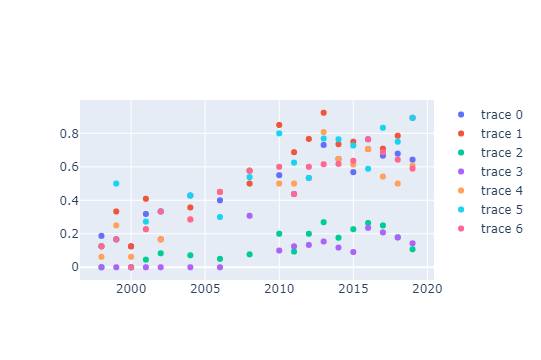

In [12]:
# graficos das perguntas globais
import plotly.graph_objects as go
import numpy as np

fig = go.Figure()
for question in global_question_df.keys():
    
    fig.add_trace(go.Scatter(x=df.index, y=df[question], mode='markers'))


# fig.update_layout(title='Mean question quality trend ({})'.format(question),
# xaxis_title='Years',
# yaxis_title='Mean')
fig.show()

### Chart specific questions

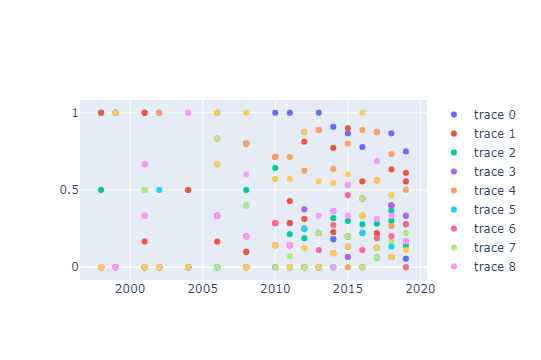

In [13]:
# graficos das perguntas especificas

import plotly.graph_objects as go
import numpy as np

fig = go.Figure()
for question in specificy_question_df.keys():
    
    fig.add_trace(go.Scatter(x=df.index, y=df[question], mode='markers'))


# fig.update_layout(title='Mean question quality trend ({})'.format(question),
# xaxis_title='Years',
# yaxis_title='Mean')
fig.show()

###  Trend of global question (Sloop and Error)

In [14]:
df

Are the impirical research objectives and the research questions defined in advance?  \
1998                                           0.187500                                      
1999                                           0.166667                                      
2000                                           0.125000                                      
2001                                           0.318182                                      
2002                                           0.333333                                      
2004                                           0.428571                                      
2006                                           0.400000                                      
2008                                           0.576923                                      
2010                                           0.550000                                      
2011                                           0.437500                                      
2012                                           0.533333                                      
2013                                           0.730769                                      
2014                                           0.647059                                      
2015                                           0.568182                                      
2016                                           0.764706                                      
2017                                           0.666667                                      
2018                                           0.678571                                      
2019                                           0.642857                                      

      \nIs the research protocol explicit? (data collection, population definition, analysis mechanisms ...)  \
1998                                           0.125000                                                        
1999                                           0.333333                                                        
2000                                           0.125000                                                        
2001                                           0.409091                                                        
2002                                           0.166667                                                        
2004                                           0.357143                                                        
2006                                           0.450000                                                        
2008                                           0.500000                                                        
2010                                           0.850000                                                        
2011                                           0.687500                                                        
2012                                           0.766667                                                        
2013                                           0.923077                                                        
2014                                           0.735294                                                        
2015                                           0.750000                                                        
2016                                           0.705882                                                        
2017                                           0.708333                                                        
2018                                           0.785714                                                        
2019                                           0.892857                                                        

      \nAre threats to validity conducted in a systematic way, and are countermeasures tak

In [15]:
#Referencia: https://www.emilkhatib.com/analyzing-trends-in-data-with-pandas/
import numpy as np
for question in global_question_df.keys():
    selected=df[question]
    selected.dropna(inplace=True)
    print(question)
    coefficients, residuals, _, _, _ = np.polyfit(range(len(selected.index)),selected,1,full=True)
    mse = residuals[0]/(len(selected.index))
    nrmse = np.sqrt(mse)/(selected.max() - selected.min())
    print('Slope ' + str(coefficients[0]))
    print('NRMSE: ' + str(nrmse))
    print("----------------------")

Are the impirical research objectives and the research questions defined in advance?
Slope 0.03346408594541903
NRMSE: 0.12899030652268764
----------------------

Is the research protocol explicit? (data collection, population definition, analysis mechanisms ...)
Slope 0.042917717614949454
NRMSE: 0.16614030600160237
----------------------

Are threats to validity conducted in a systematic way, and are countermeasures taken to reduce them?
Slope 0.011405209478192542
NRMSE: 0.23299574313369734
----------------------

Is a pilot study presented in the research?
Slope 0.012710605325793815
NRMSE: 0.21385691507777566
----------------------

Is the data presented or made available for further analysis?
Slope 0.033759166631138954
NRMSE: 0.1635833025408442
----------------------

Does the research make evident the method of analysis applied in your data?
Slope 0.04041450768822833
NRMSE: 0.15118507009962537
----------------------
Do the findings of the empirical study answer the research question

###  Trend of specific question (Sloop and Error)

In [16]:
#Referencia: https://www.emilkhatib.com/analyzing-trends-in-data-with-pandas/
import numpy as np
for question in specificy_question_df.keys():
    selected=df[question]
    selected.dropna(inplace=True)
    print(question)
    coefficients, residuals, _, _, _ = np.polyfit(range(len(selected.index)),selected,1,full=True)
    mse = residuals[0]/(len(selected.index))
    nrmse = np.sqrt(mse)/(selected.max() - selected.min())
    print('Slope ' + str(coefficients[0]))
    print('NRMSE: ' + str(nrmse))
    print("----------------------")
    

Is the case and its analysis units explicitly defined and presented? (size, domain, process and subjects)
Slope -0.003248786888492774
NRMSE: 0.2322413048128045
----------------------
Does the researcher avoid any interference in the process, technique and methodology used in the case study?
Slope -0.010750935475200181
NRMSE: 0.2478949662395996
----------------------
Is triangulation applied? (multiple methods of collection and analysis, multiple authors and various theories)
Slope -0.018551145205556976
NRMSE: 0.2150884770899163
----------------------
Are ethical issues handled appropriately (personal intentions, integrity, confidentiality, consent and approval of the review board)?
Slope 0.03078274870554282
NRMSE: 0.18239440893336517
----------------------
Does the study report provide implications for practice?
Slope 0.002513139094021405
NRMSE: 0.23880021317107678
----------------------
Are the hypothesis (null hypothesis and alternative hypothesis) presented?
Slope -0.018981923577511

In [17]:
# import matplotlib.pyplot as plt
# plt.plot(selected)
# plt.plot([coefficients[0]*x + coefficients[1] for x in range(len(selected))])
# plt.show()

### Trend Charts
**Ordinary Least Squares regression** line will be drawn for each discrete-color/symbol group

Ref.: https://pt.wikipedia.org/wiki/M%C3%A9todo_dos_m%C3%ADnimos_quadrados#:~:text=O%20M%C3%A9todo%20dos%20M%C3%ADnimos%20Quadrados,estimado%20e%20os%20dados%20observados

### Trend of global questions

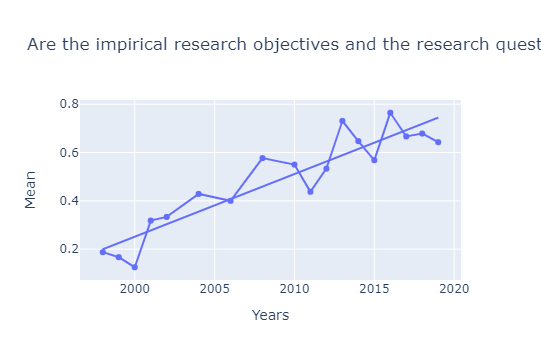

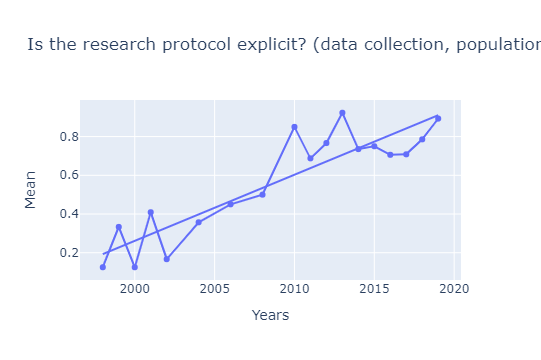

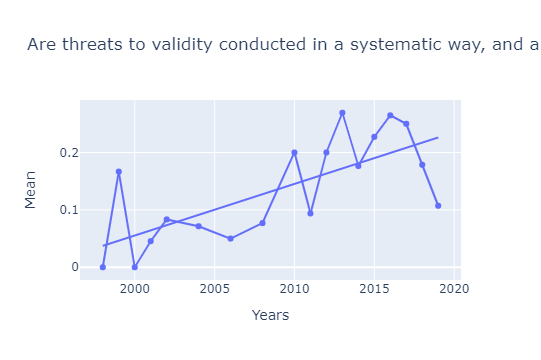

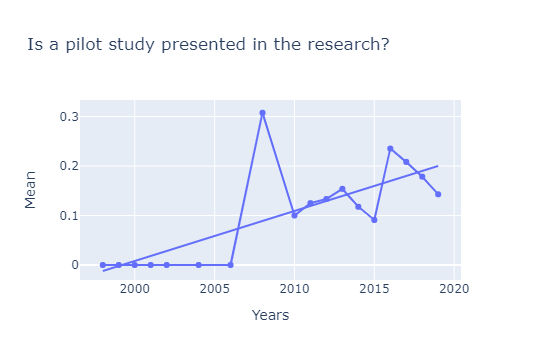

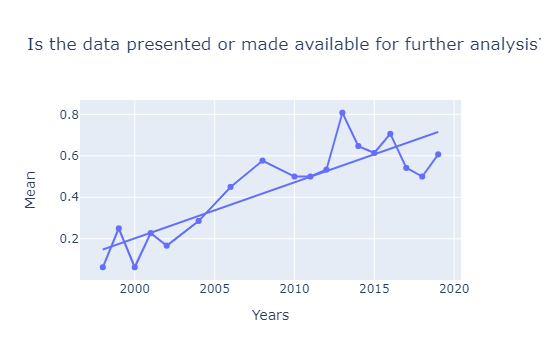

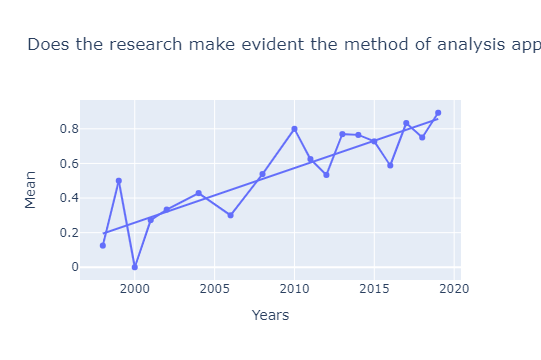

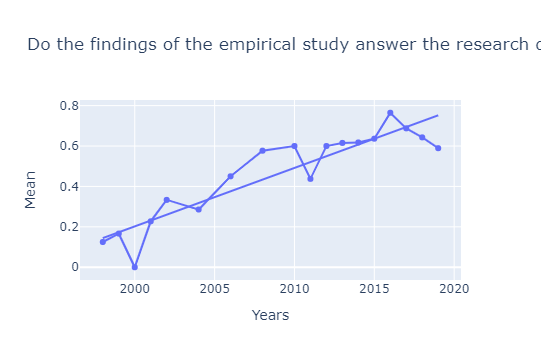

In [18]:
import plotly.express as px

if not os.path.exists("images"):
    os.mkdir("images")

if not os.path.exists("images/global"):
    os.mkdir("images/global")    

for question in global_question_df:
    fig = px.scatter(global_question_df, x= df.index, y=question, trendline="ols", title = question)
    fig.update_layout(xaxis_title="Years",
        yaxis_title="Mean")
    
    fig.data[0].update(mode='markers+lines')
    
    fig.show()
#     fig.write_image("images/global/{}.png".format(question.replace("/",",")))

### Trend of specific questions

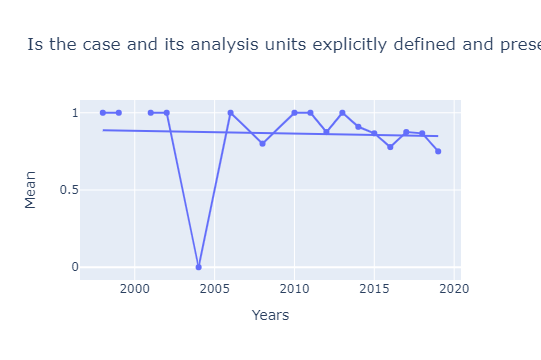

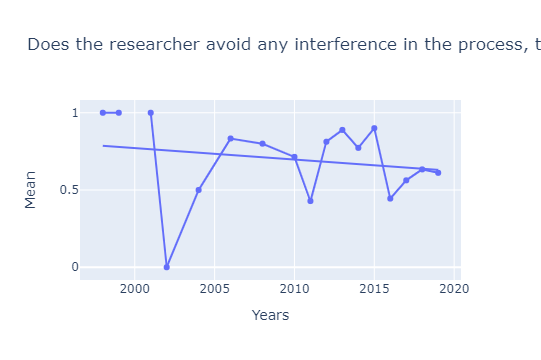

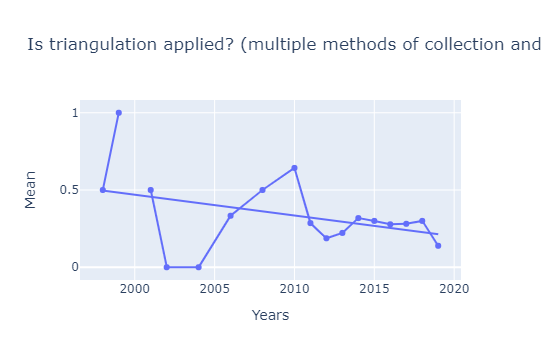

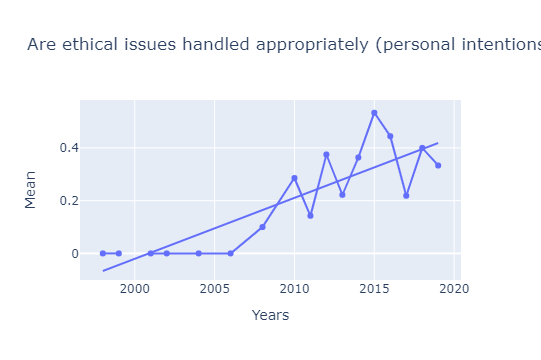

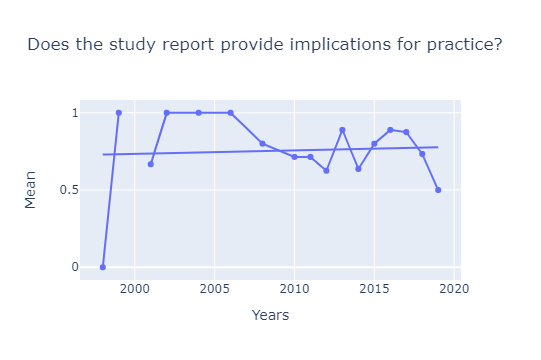

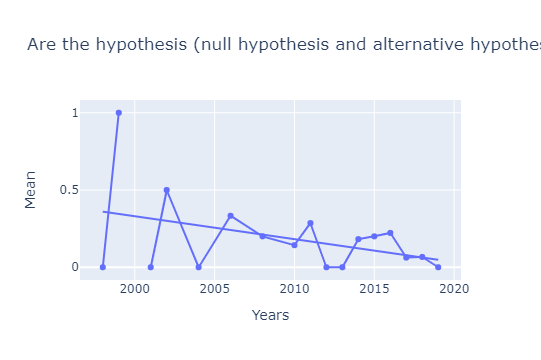

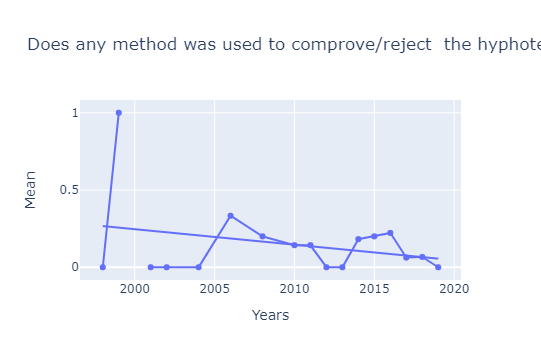

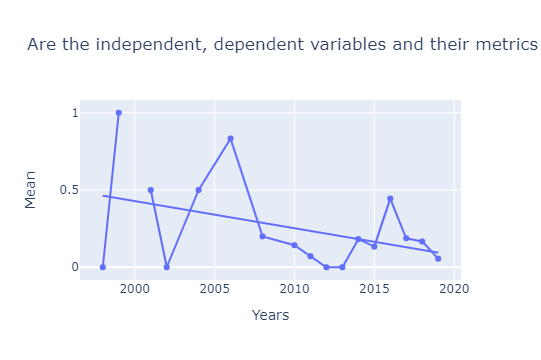

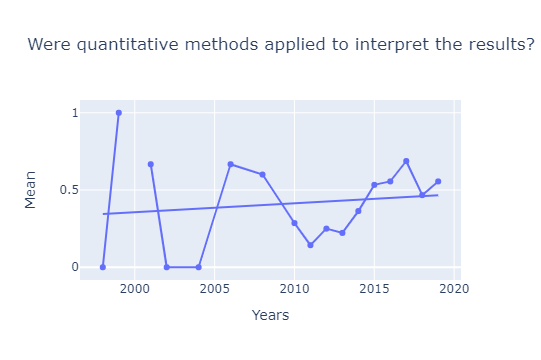

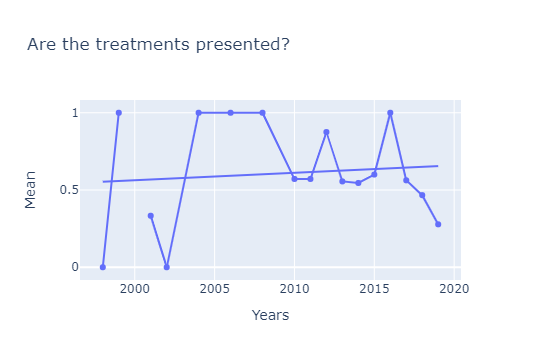

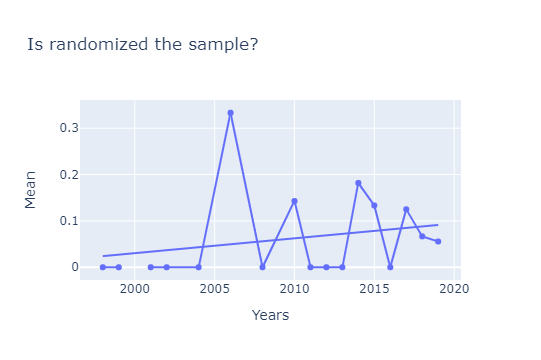

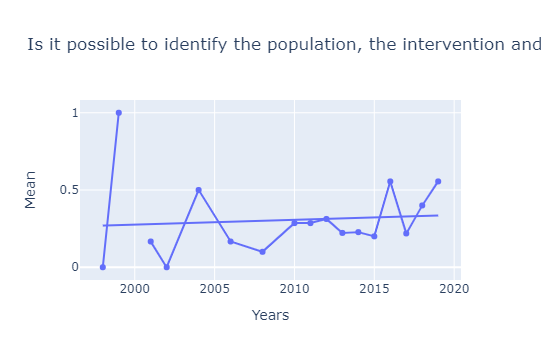

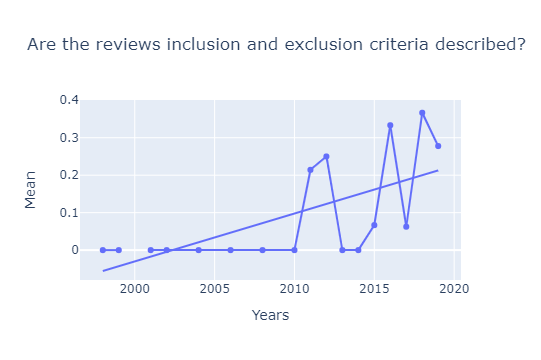

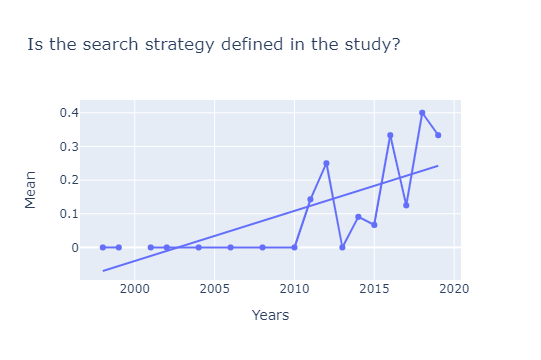

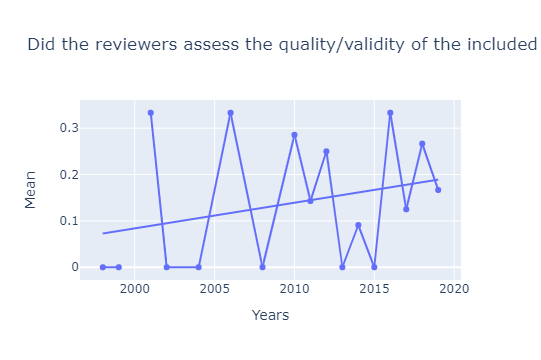

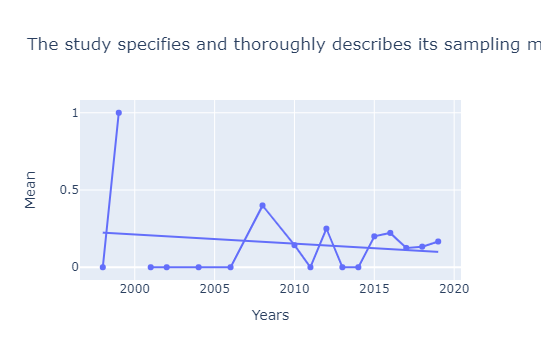

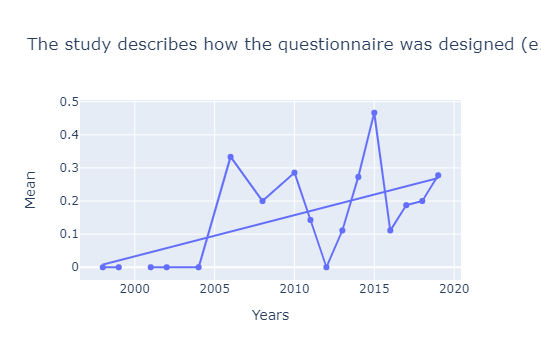

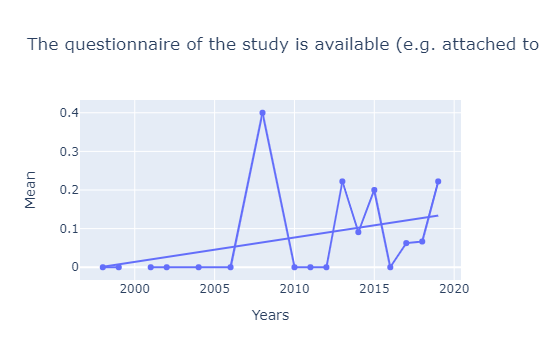

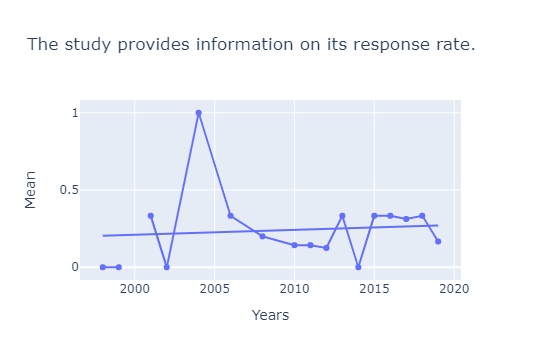

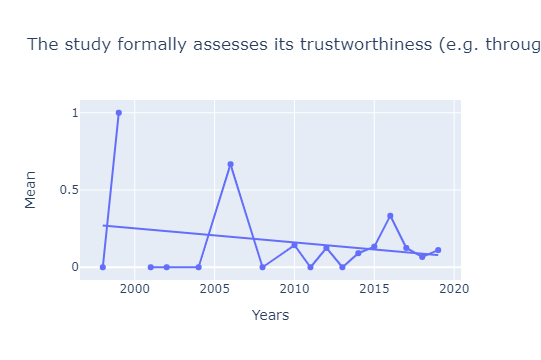

In [19]:
import plotly.express as px
import os

if not os.path.exists("images"):
    os.mkdir("images")

if not os.path.exists("images/specific"):
    os.mkdir("images/specific")    
    
    
for question in specificy_question_df:
    fig = px.scatter(specificy_question_df, x= df.index, y=question, trendline="ols", title = question)
    fig.update_layout(xaxis_title="Years",
        yaxis_title="Mean")
    
    fig.data[0].update(mode='markers+lines')
    
    fig.show()
#     fig.write_image("images/specific/{}.png".format(question.replace("/",",")))

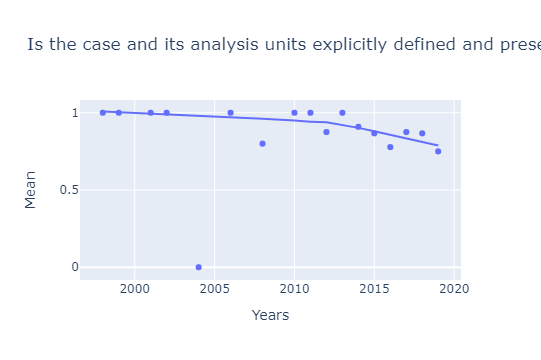

In [20]:
import plotly.express as px
question = "Is the case and its analysis units explicitly defined and presented? (size, domain, process and subjects)"
fig = px.scatter(specificy_question_df, x= df.index, y=question, trendline="lowess", title = question)
fig.update_layout(xaxis_title="Years",
    yaxis_title="Mean")
fig.show()

In [21]:
# from statsmodels.tsa.seasonal import seasonal_decompose
# series = df["Are the impirical research objectives and the research questions defined in advance?"]
# result = seasonal_decompose(series.values, model='additive')
# print(result.trend)
# print(result.seasonal)
# print(result.resid)
# print(result.observed)

# Quality Rate Analysis

In [22]:
years = [2019, 2018,2017,2016,2015,2014,2013,2012,2011,2010,2008,2006,2004,2002,2001,2000,1999,1998]

Quality Rates (Case Study)

In [23]:
rates = [0.9286,0.0000,0.0000,1.1810,0.9357,0.8000,1.3429,1.1952,1.3238,1.1405,1.3486,1.3190,1.1982,1.2813,1.4214,1.2871,1.4250,1.2270]

df=pd.DataFrame(list(zip(years, rates)),
               columns =['years', 'average'])

#Referencia: https://www.emilkhatib.com/analyzing-trends-in-data-with-pandas/
import numpy as np
selected=df["average"]
coefficients, residuals, _, _, _ = np.polyfit(range(len(selected.index)),selected,1,full=True)
mse = residuals[0]/(len(selected.index))
nrmse = np.sqrt(mse)/(selected.max() - selected.min())
print('Slope ' + str(coefficients[0]))
print('NRMSE: ' + str(nrmse))
print("coefficients: "+ str(coefficients))
print("----------------------")

Slope 0.05353942208462332
NRMSE: 0.21599566759994357
coefficients: [0.05353942 0.62020936]
----------------------


Quality Rates (Systematic Review)

In [24]:
rates = [0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.7143,1.3571,0.0000,1.2143,1.6071,1.0952,1.8571,1.4494,1.4226]

df=pd.DataFrame(list(zip(years, rates)),
               columns =['years', 'average'])

#Referencia: https://www.emilkhatib.com/analyzing-trends-in-data-with-pandas/
import numpy as np
selected=df["average"]
coefficients, residuals, _, _, _ = np.polyfit(range(len(selected.index)),selected,1,full=True)
mse = residuals[0]/(len(selected.index))
nrmse = np.sqrt(mse)/(selected.max() - selected.min())
print('Slope ' + str(coefficients[0]))
print('NRMSE: ' + str(nrmse))
print("coefficients: "+ str(coefficients))
print("----------------------")

Slope 0.11441104231166152
NRMSE: 0.24219286428005685
coefficients: [ 0.11441104 -0.32154386]
----------------------


Quality Rates (Experiments)

In [25]:
rates = [0.0000,1.5476,0.0000,0.0000,0.0000,0.0000,1.6429,1.4047,1.3810,0.0000,0.0000,0.0000,1.5000,1.8571,1.3810,1.4286,1.8571,0.0000]

df=pd.DataFrame(list(zip(years, rates)),
               columns =['years', 'average'])

#Referencia: https://www.emilkhatib.com/analyzing-trends-in-data-with-pandas/
import numpy as np
selected=df["average"]
coefficients, residuals, _, _, _ = np.polyfit(range(len(selected.index)),selected,1,full=True)
mse = residuals[0]/(len(selected.index))
nrmse = np.sqrt(mse)/(selected.max() - selected.min())
print('Slope ' + str(coefficients[0]))
print('NRMSE: ' + str(nrmse))
print("coefficients: "+ str(coefficients))
print("----------------------")

Slope 0.053467079463364306
NRMSE: 0.39724568518756753
coefficients: [0.05346708 0.3233076 ]
----------------------


Quality Rates (Survey)

In [26]:
rates = [0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.3143,1.5857,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.6572,0.0000,1.4381]
df=pd.DataFrame(list(zip(years, rates)),
               columns =['years', 'average'])

#Referencia: https://www.emilkhatib.com/analyzing-trends-in-data-with-pandas/
import numpy as np
selected=df["average"]
coefficients, residuals, _, _, _ = np.polyfit(range(len(selected.index)),selected,1,full=True)
mse = residuals[0]/(len(selected.index))
nrmse = np.sqrt(mse)/(selected.max() - selected.min())
print('Slope ' + str(coefficients[0]))
print('NRMSE: ' + str(nrmse))
print("coefficients: "+ str(coefficients))
print("----------------------")

Slope 0.035771620227038184
NRMSE: 0.3609214331549077
coefficients: [0.03577162 0.02901345]
----------------------


General Quality rates

In [27]:
rates = [0.929,1.548,0.000,1.181,0.936,0.800,1.300,1.315,1.332,1.222,1.318,1.319,1.255,1.341,1.470,1.389,1.464,1.324]
df=pd.DataFrame(list(zip(years, rates)),
               columns =['years', 'average'])

#Referencia: https://www.emilkhatib.com/analyzing-trends-in-data-with-pandas/
import numpy as np
selected=df["average"]
coefficients, residuals, _, _, _ = np.polyfit(range(len(selected.index)),selected,1,full=True)
mse = residuals[0]/(len(selected.index))
nrmse = np.sqrt(mse)/(selected.max() - selected.min())
print('Slope ' + str(coefficients[0]))
print('NRMSE: ' + str(nrmse))
print("coefficients: "+ str(coefficients))
print("----------------------")

Slope 0.034587203302373554
NRMSE: 0.1907511491907906
coefficients: [0.0345872  0.89728655]
----------------------


In [29]:
years = [1999,
2002,
2006,
2008,
2012,
2013,
2014,
2015,
2016,
2018]
rates = [1,
0,
1,
0.6,
1,
1,
0.727273,
0.8,
0.777778,
0.8]
df=pd.DataFrame(list(zip(years, rates)),
               columns =['years', 'average'])

#Referencia: https://www.emilkhatib.com/analyzing-trends-in-data-with-pandas/
import numpy as np
selected=df["average"]
coefficients, residuals, _, _, _ = np.polyfit(range(len(selected.index)),selected,1,full=True)
mse = residuals[0]/(len(selected.index))
nrmse = np.sqrt(mse)/(selected.max() - selected.min())
print('Slope ' + str(coefficients[0]))
print('NRMSE: ' + str(nrmse))
print("coefficients: "+ str(coefficients))
print("----------------------")

Slope 0.01834100000000006
NRMSE: 0.2844874653425702
coefficients: [0.018341  0.6879706]
----------------------


In [30]:
years = [1999,
2002,
2006,
2008,
2012,
2013,
2014,
2015,
2016,
2018]
rates = [1,
0,
0.666667,
0.6,
0.5,
0.888889,
0.545455,
0.466667,
0.777778,
0.333333]
df=pd.DataFrame(list(zip(years, rates)),
               columns =['years', 'average'])

#Referencia: https://www.emilkhatib.com/analyzing-trends-in-data-with-pandas/
import numpy as np
selected=df["average"]
coefficients, residuals, _, _, _ = np.polyfit(range(len(selected.index)),selected,1,full=True)
mse = residuals[0]/(len(selected.index))
nrmse = np.sqrt(mse)/(selected.max() - selected.min())
print('Slope ' + str(coefficients[0]))
print('NRMSE: ' + str(nrmse))
print("coefficients: "+ str(coefficients))
print("----------------------")

Slope -0.008062442424242412
NRMSE: 0.2703912570651559
coefficients: [-0.00806244  0.61415989]
----------------------
